In [34]:
!pip install torch torchvision

You are using pip version 18.0, however version 18.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [35]:
#Let's get rid of some imports
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
#Define the model 
import torch
import torch.nn as nn
import torch.nn.functional as F
import pandas as pd

Getting Data

In [36]:
train=pd.read_csv('input/train.csv')
test=pd.read_csv('input/test.csv')

In [37]:
print(train.keys())

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

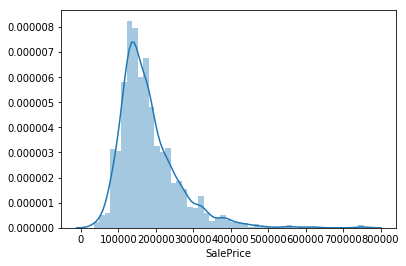

In [38]:
import seaborn as sns
sns.distplot(train['SalePrice'])

Preparing to Model

In [39]:
from sklearn.model_selection  import train_test_split
cols = ['OverallQual','GrLivArea', 'GarageCars','TotalBsmtSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt']
X = train[cols].values
y = train['SalePrice'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(1022, 7) (438, 7) (1022,) (438,)


In [40]:
X

array([[   7, 1710,    2, ...,    2,    8, 2003],
       [   6, 1262,    2, ...,    2,    6, 1976],
       [   7, 1786,    2, ...,    2,    6, 2001],
       ...,
       [   7, 2340,    1, ...,    2,    9, 1941],
       [   5, 1078,    1, ...,    1,    5, 1950],
       [   5, 1256,    1, ...,    1,    6, 1965]])

In [41]:
#Define training hyperprameters.
batch_size = 50
num_epochs = 200
learning_rate = 0.01
size_hidden= 100

#Calculate some other hyperparameters based on data.  
batch_no = len(X_train) // batch_size  #batches
cols=X_train.shape[1] #Number of columns in input matrix
n_output=1

In [42]:
#Create the model
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
# Assume that we are on a CUDA machine, then this should print a CUDA device:
print("Executing the model on :",device)
class Net(torch.nn.Module):
    def __init__(self, n_feature, size_hidden, n_output):
        super(Net, self).__init__()
        self.hidden = torch.nn.Linear(cols, size_hidden)   # hidden layer
        self.predict = torch.nn.Linear(size_hidden, n_output)   # output layer

    def forward(self, x):
        x = F.relu(self.hidden(x))      # activation function for hidden layer
        x = self.predict(x)             # linear output
        return x
net = Net(cols, size_hidden, n_output)

Executing the model on : cpu


In [43]:
#Adam is a specific flavor of gradient decent which is typically better
optimizer = torch.optim.Adam(net.parameters(), lr=learning_rate)
#optimizer = torch.optim.SGD(net.parameters(), lr=0.2)
criterion = torch.nn.MSELoss(size_average=False)  # this is for regression mean squared loss

/anaconda3/lib/python3.6/site-packages/torch/nn/functional.py:52: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


In [66]:
from sklearn.utils import shuffle
from torch.autograd import Variable
running_loss = 0.0
for epoch in range(num_epochs):
    #Shuffle just mixes up the dataset between epocs
    X_train, y_train = shuffle(X_train, y_train)
    # Mini batch learning
    for i in range(batch_no):
        start = i * batch_size
        end = start + batch_size
        inputs = Variable(torch.FloatTensor(X_train[start:end]))
        labels = Variable(torch.FloatTensor(y_train[start:end]))
        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        #print("outputs",outputs)
        #print("outputs",outputs,outputs.shape,"labels",labels, labels.shape)
        loss = criterion(outputs, torch.unsqueeze(labels,dim=1))
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        
    print('Epoch {}'.format(epoch+1), "loss: ",running_loss)
    running_loss = 0.0

Epoch 1 loss:  1219962210304.0
Epoch 2 loss:  1223247652864.0
Epoch 3 loss:  1203768920064.0
Epoch 4 loss:  1199411042304.0
Epoch 5 loss:  1201643804672.0
Epoch 6 loss:  1179805730816.0
Epoch 7 loss:  1202744309760.0
Epoch 8 loss:  1202469781504.0
Epoch 9 loss:  1186354720768.0
Epoch 10 loss:  1167812280320.0
Epoch 11 loss:  1263617619968.0
Epoch 12 loss:  1192225226752.0
Epoch 13 loss:  1195478575104.0
Epoch 14 loss:  1182549223424.0
Epoch 15 loss:  1057180358656.0
Epoch 16 loss:  1034211969024.0
Epoch 17 loss:  1183615055872.0
Epoch 18 loss:  1207349026816.0
Epoch 19 loss:  1221980616704.0
Epoch 20 loss:  1159722412032.0
Epoch 21 loss:  1203817109504.0
Epoch 22 loss:  1198377818112.0
Epoch 23 loss:  1165746061312.0
Epoch 24 loss:  1216197629952.0
Epoch 25 loss:  1250644082688.0
Epoch 26 loss:  1233062639616.0
Epoch 27 loss:  1230951780352.0
Epoch 28 loss:  1170946711552.0
Epoch 29 loss:  1187060942848.0
Epoch 30 loss:  1211558770688.0
Epoch 31 loss:  1201569988608.0
Epoch 32 loss:  1

In [67]:
import pandas as pd
from sklearn.metrics import r2_score

X = Variable(torch.FloatTensor(X_train)) 
result = net(X)
pred=result.data[:,0].numpy()
print(len(pred),len(y_train))
r2_score(pred,y_train)

1022 1022


0.7696913734845958

In [68]:
import pandas as pd
from sklearn.metrics import r2_score
#This is a little bit tricky to get the resulting prediction.  
def calculate_r2(x,y=[]):
    """
    This function will return the r2 if passed x and y or return predictions if just passed x. 
    """
    # Evaluate the model with the test set. 
    X = Variable(torch.FloatTensor(x))  
    result = net(X) #This outputs the value for regression
    result=result.data[:,0].numpy()
  
    if len(y) != 0:
        r2=r2_score(result, y)
        print("R-Squared", r2)
        #print('Accuracy {:.2f}'.format(num_right / len(y)), "for a total of ", len(y), "records")
        return pd.DataFrame(data= {'actual': y, 'predicted': result})
    else:
        print("returning predictions")
        return result


In [69]:
result1=calculate_r2(X_train,y_train)
result2=calculate_r2(X_test,y_test)

R-Squared 0.7696913734845958
R-Squared 0.7140118118930414
